## Part 2: The Posterior – The Goal of Bayesian Inference

### $\pmb{p(\theta|data)}=\frac{p(data|\theta)p(\theta)}{p(data)}$ 

后验概率分布 $p(\theta|data)$ 可以用来估计我们感兴趣的参数，比如疾病发生率，地球海水覆盖率等。

在本节课程中，我们将探究后验概率分布是如何形成的，并讨论后验分布在实践中如何帮助我们解决问题。

### 后验如何更新通过数据更新我们的先验

在贝叶斯统计中，后验分布将我们**已有的信念**与**观察到的数据信息**结合起来，产生一个**更新后的信念**，代表我们对知识更新的状态。

为了计算后验分布，我们必须选择一个**似然函数**(第四节课)。似然函数的关键在于建立参数与数据的联系。

在更新后验之前，参数需要首先被赋以先验，表示我们在得到数据前的信念(第三节课)。

然后将先验和似然通过贝叶斯公式结合——得到后验分布:
$p(\theta|data) \sim p(data|\theta) * p(\theta)$ 

注意，因为分母 $p(data)$是一个定值，在上一节课中提到它的作用在于使得后验分布成为一个有效(valid)概率分布。
这里为了方便讨论先验和似然对于后验的影响，我们先忽略分母部分。

**以探究地球海水覆盖率为例。**

- 假设我们在获得数据以前的**先验**认为：地球海水覆盖率为0-1的可能是相等的。




In [3]:
# numpy 是专门用于数组运算的包
import numpy as np
# 从scipy.stats里载入分布函数
import scipy.stats as st
# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt
# seaborn是专门用于绘制统计数据的包
import seaborn as sns
# arviz 是专门用于贝叶斯统计会绘制的包
import arviz as az

In [6]:
x = np.linspace(0,1,100)

prior = st.uniform.pdf(x,0,1)/np.sum(st.uniform.pdf(x,0,1))

plt.plot(x, prior , color = 'grey',ls = '--')
plt.xlabel("Sea surface coverage")
plt.ylabel("probability density")

Text(0, 0.5, 'probability density')

<Figure size 432x288 with 1 Axes>

In [9]:
likelihood = st.binom.pmf(7,10, x)

plt.plot(x, likelihood , color = 'grey')
plt.xlabel("Sea surface coverage")
plt.ylabel("likelihood")

Text(0, 0.5, 'likelihood')

<Figure size 432x288 with 1 Axes>

- 通过贝叶斯公式 $p(\theta|data) \sim p(data|\theta) * p(\theta)$ ，得到后验分布:

In [11]:
unstd_posterior = prior*likelihood

plt.plot(x, unstd_posterior , color = 'black')

<Figure size 432x288 with 1 Axes>

在同一副图里对比先验，似然与后验分布。

In [13]:
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--',label="prior")
plt.plot(x, likelihood , color = 'blue',label="likelihood")
plt.plot(x, posterior , color = 'red',label="posterior")
plt.legend()

<Figure size 432x288 with 1 Axes>

可以看到，由于先验设置得非常平滑（无先验信息），因此我们得到的后验分布也相对平滑。

- 假设我们再收集10次抛地球仪的数据，得到6次海水向上。
- 此时，我们可以将之前的后验作为先验再次通过数据更新我们的信念。

In [17]:
likelihood = st.binom.pmf(6,10, x)
unstd_posterior = posterior*likelihood
posterior2 = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, posterior , color = 'grey',ls = '--',label="prior")
plt.plot(x, likelihood, color = 'blue',label="likelihood")
plt.plot(x, posterior2, color = 'red',label="posterior")
plt.legend()

<Figure size 432x288 with 1 Axes>

可以看到，后验分布 (红色) 在先验 (灰色) 的基础上向似然更加接近了。

这里体现了贝叶斯方法的一个优势：数据顺序不变性 (data order invariance)。
- 即相对于频率学派通过一次收集数据进行统计推断。
- 贝叶斯方法可以不断的获取数据来更新自己的推断。
- 并且这种推断的过程不受数据收集先后顺序的影响。比如，第一数据为7次海面朝上，第二次数据为6次海面朝上.

甚至我们可以在每次获得数据后，对后验分布进行更新：


![Image Name](https://cdn.kesci.com/upload/image/rhqd6akbc6.gif?imageView2/0/w/500/h/500)

我们可以把刚才多次对于后验的更新合并为一次：

In [18]:
# 两次数据合并后，20次数据中有13次海水向上
likelihood = st.binom.pmf(13,20, x)
unstd_posterior = prior*likelihood
posterior3 = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--',label="prior")
plt.plot(x, likelihood, color = 'blue',label="likelihood")
plt.plot(x, posterior3, color = 'red',label="posterior")
plt.legend()

<Figure size 432x288 with 1 Axes>

可见，合并数据对后验的更新与连续两次对后验更新的结果是一致的。

现在，我们进行一些**练习**：尝试 (1) 不同的数据会对后验产生如何的影响，(2) 通过多次数据对后验分布进行更新

In [ ]:
# numpy 是专门用于数组运算的包
import numpy as np
# 从scipy.stats里载入分布函数
import scipy.stats as st
# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt
# seaborn是专门用于绘制统计数据的包

# 定义先验
x = np.linspace(0,1,100)
prior = st.uniform.pdf(x,0,1)/np.sum(st.uniform.pdf(x,0,1))

######################################################
# 请填写总抛地球仪的次数
n = ...
# 请填写海面朝上的次数
k = ...
######################################################
# 计算似然
likelihood = st.binom.pmf(k,n, x)

# 通过先验与似然，更新后验
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--',label="prior")
plt.plot(x, likelihood, color = 'blue',label="likelihood")
plt.plot(x, posterior, color = 'red',label="posterior")
plt.legend()

(2) 以上一次的后验作为先验，通过新的数据更新后验：

In [ ]:
# 以上一次的后验作为先验
prior = posterior

######################################################
# 请填写总抛地球仪的次数
n = ...
# 请填写海面朝上的次数
k = ...
######################################################
# 计算似然
likelihood = st.binom.pmf(k,n, x)

# 通过先验与似然，更新后验
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--',label="prior")
plt.plot(x, likelihood, color = 'blue',label="likelihood")
plt.plot(x, posterior, color = 'red',label="posterior")
plt.legend()

最后，我们**练习**设置不同先验对后验的影响。
- 我们此时假设，海水的覆盖率为0.7或者人任何0-1的值
- 并且先验服从正态分布
- 此时，我们假设收集到的数据为10次数据中有7次海水朝上

In [ ]:
# 定义先验
######################################################
# 设置先验的均值：比如0.7
mu = ...
# 设置先验的标准差：比如0.1
sd = ...
######################################################
x = np.linspace(0,1,100)
prior = st.norm.pdf(x,mu,sd)/np.sum(st.norm.pdf(x,mu,sd))

# 计算似然
likelihood = st.binom.pmf(7,10, x)

# 通过先验与似然，更新后验
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--',label="prior")
plt.plot(x, likelihood, color = 'blue',label="likelihood")
plt.plot(x, posterior, color = 'red',label="posterior")
plt.legend()

相信大家已经发现了一些**规律**：
- 后验分布的峰的位置介于似然峰和先验峰之间
- 随着数据样本量的增加 (抛地球仪次数的增多)，似然函数变得越来越高，越来越窄，对后验的影响越来越大。即后验更接近似然而不是先验。


- 不同似然对后验分布的影响
	![Image Name](https://cdn.kesci.com/upload/image/rjguv67ra5.png?imageView2/0/w/400/h/400) 

- 不同先验对后验分布的影响
	![Image Name](https://cdn.kesci.com/upload/image/rjguvhtcgx.png?imageView2/0/w/400/h/400) 
	
- 不同数据样本量对后验分布的影响
	![Image Name](https://cdn.kesci.com/upload/image/rjguvqbsxi.png?imageView2/0/w/400/h/400)
</figure>

从最后一个图中可以看到，当样本量很大时，后验分布也会很高很窄
- 这表明我们对于参数 (海水覆盖率) 估计的信心也会更大，即不确定感更少 (uncertarinty，第五节课中关于概率和不确定性的理解)

这引出一个问题，当我们获得参数的后验分布时，我们怎么去解释这个分布？

可以认为海水覆盖率为分布的均值？最高点对应的参数值 (信心最高位置对应的参数值)？

我们又怎么结合分布的宽度理解不确定 (uncertarinty)与参数的关系？

### Point Parameter Estimates

在前面我们知道了如何得到参数的后验分布。

频率论通过样本均值（点估计）进行统计推断 (statistical inference)，但我们该如何通过后验分布进行统计推断?

贝叶斯统计中提供了三种对后验分布的点估计量:

- 后验均值 (posterior mean)
- 后验中位数 (posterior median)
- 最大后验估计(maximum a posteriori, MAP), 即后验众数 (posterior mode)

如果参数后验分布为正态分布，那么后验均值，中位数与众数是接近的。
- 我们假设参数 (海水覆盖率) 后验分布服从均值为0.7，标值差为0.1的正态分布

In [29]:
# 生成50000个参数值
theta_posterior = st.norm.rvs(loc = 0.7, scale = 0.1,size = 50000)

# 绘制参数后验分布
sns.kdeplot(theta_posterior)

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 1 Axes>

In [30]:
# statistics可以计算数据的平均值，中位数和众数(保留两位小数)
import statistics

print("后验均值为：",round(statistics.mean(theta_posterior),2) )
print("后验中位数为：",round(statistics.median(theta_posterior),2) )
print("后验众数为：", statistics.mode(theta_posterior.round(2)) )

后验均值为： 0.7
后验中位数为： 0.7
后验众数为： 0.69


但如果参数的后验分布不是正态分布，而是一个存在偏态和多峰的分布呐？

In [34]:
# 假设参数的后验分布服从一个均值为1和5，标准差同为1的多峰分布
theta_posterior = np.append(st.norm.rvs(loc = 0.5,scale = 0.05,size = 6000),st.norm.rvs(loc = 0.7,scale = 0.05,size = 4000))

# 绘制参数后验分布
sns.kdeplot(theta_posterior)

<AxesSubplot:ylabel='Density'>

<Figure size 432x288 with 1 Axes>

In [35]:
print("后验均值为：",round(statistics.mean(theta_posterior),2) )
print("后验中位数为：",round(statistics.median(theta_posterior),2) )
print("后验众数为：", statistics.mode(theta_posterior.round(2)) )

后验均值为： 0.58
后验中位数为： 0.55
后验众数为： 0.5


其平均值，中位数和众数(MAP)并不相等。

- 其中众数为分布最高点对应的参数值
- 中位数左右两侧分布的面积各占50%
- 平均值的位置接近中位数，并且它容易分布形态的影响

![Image Name](https://cdn.kesci.com/upload/image/rjddhc2wo.png?imageView2/0/w/500/h/500)


选择哪种点估计进行统计推断？

- 首先后验平均值：均值对分布敏感，更能代表整个分布；并且更贴合测量理论。
- 次选后验中位数：如果平均值被极值影响，此时最好使用中位数。
- 慎选后验众数：众数往往存在偏差，并不能很好的代表后验分布。

### Intervals of Uncertainty

通过点估计进行统计推断忽略了后验分布的变异性与不确定性 (uncertainty)。

我们通常用区间 (interval)去描述这种不确定性。

- 在贝叶斯的视角中，后验分布的不确定为可信区间(credible interval)。
- 在频率学派的视角中，通过置信区间 (confidence) 描述数据的不确定性。

然而，我们常常将两者的定义混淆在一起。

#### 贝叶斯可信区间

贝叶斯可信区间 (Bayesian credible intervals)
- 指参数出现在可信区间内的概率。
  
  比如，海水覆盖率95%的可信区间为 [0.6, 0.8m]，那么海水覆盖率为0.7出现在该区间的概率为95%。
- 描述参数值位置的不确定性。即相对于频率学派认为海水覆盖率是固定值 (比如0.7)，贝叶斯统计可能认为海水覆盖率为0.7的可信度最大。
- 通过后验分布计算得到的。即相对于频率学派通过抽样数据估计置信区间，可信区间可以通过后验分布进行计算。

贝叶斯置信区间也存在不同的估计指标：

- 后验中心区间(the central posterior interval)
  - 通过百分位数计算。
    
    比如，对于90%后验中心区间，计算后验分布在5%和95%的百分位数即可。
  - 该区间以参数的中值为中心。
- 最大后验概率密度区间(the highest density interval, HDI; 或者 the highest posterior density, HPD)
  - 基于后验概率密度最高占比。
    
    比如，90%HDI为后验分布中y轴最高的90%的部分对应的x轴的范围。
  - 其性质是这个范围中的概率密度永远不低于外部。

HDI更具代表性，因此通常以HDI作为贝叶斯的可信区间。以下代码展示了如何绘制和计算贝叶斯可信区间。

In [44]:
# 假设参数的后验分布服从一个均值为5，标准差为1的正太分布
theta_posterior = st.norm.rvs(loc = 5,size = 50000)

# 绘制参数后验分布, 包括其均值与HDI
az.plot_posterior(theta_posterior,hdi_prob=0.95)

<AxesSubplot:title={'center':'x'}>

<Figure size 432x288 with 1 Axes>

In [45]:
# 通过arviz包的hdi函数计算后验分布的HDI
print("后验分布最大概率密度区间HDI：", az.hdi(theta_posterior,hdi_prob=0.95))
# 通过numpy包的quantile函数计算后验分布的百分位
print("后验分布的中心区间：", np.quantile(theta_posterior,[0.025,0.975]))

后验分布最大概率密度区间HDI： [3.02984037 6.93337463]
后验分布的中心区间： [3.0509511  6.95683271]


可见，最大概率密度区间HDI与中心区间是非常接近的。

但是当后验分布为非正态分布时，两种存在区别，比如：


![Image Name](https://cdn.kesci.com/upload/image/rjdef48vqj.png?imageView2/0/w/640/h/640)

- 此时，后验中心区间从中位数的两侧开始展开。
- 而最大概率密度区间HDI从y轴最高的两处开始展开。

#### 我们通过一个练习来了解如何从后验分布中得到点估计和可信区间：

- 首先，我们设置海水的覆盖率的**先验**，比如0-1存在相同的可能。
- 然后，我们假设收集到的**数据**为10次数据中有7次海水朝上。
- 接着，我们通过似然和数据更新先验，得到**后验**。
- 最后，**你的任务是计算后验分布的均值和HDI**。

In [41]:
# 定义先验
x = np.linspace(0,1,100)
prior = st.uniform.pdf(x,0,1)/np.sum(st.uniform.pdf(x,0,1))

# 计算似然
likelihood = st.binom.pmf(7,10, x)

# 通过先验与似然，更新后验
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

In [37]:
# statistics可以计算数据的平均值，中位数和众数(保留两位小数)
import statistics
# arviz 是专门用于贝叶斯统计会绘制的包
import arviz as az

###############################################
# 参数后验分布为 posterior
# 请使用 statistics.mean() 计算后验分布均值
###############################################
posterior_mean = statistics.mean(...)
print("后验均值为：",round(posterior_mean,3) )

后验均值为： 0.01
后验分布的中心区间： [0.         0.02910754]


In [ ]:
###############################################
# 请使用 az.hdi() 计算后验分布HDI
###############################################
# 通过arviz包的hdi函数计算后验分布的HDI
posterior_HDI = az.hdi(..., hdi_prob=0.95)
print("后验分布最大概率密度区间HDI：", posterior_HDI )

In [ ]:
###############################################
# 请使用 az.plot_posterior()函数绘制后验分布图像
###############################################
az.plot_posterior(...)

#### 频率学置信区间 vs. 贝叶斯可信区间

在频率学派统计中，比如我们抛地球仪100次，其中有70次海面朝上，其95%的置信区间为[0.6, 0.8]

此时我们能认为，海水覆盖率=0.7在这个区间的概率为95%吗, 或者海水覆盖率>0.8时的概率为5%？

上面的理解仿佛是显而易见的，但事实却是：

- 错误的理解：真实海水覆盖率在这个区间的概率为95%。
- 正确的解释：当我们收集无数次数据(即获得无数个抛100次地球仪的数据)，然后根据数据计算的无数个置信区间，这无数个置信区间包括真实海水覆盖率=0.7在这个区间的概率为95%的概率为95%。

显然，频率学派对于置信区间的定义是难以理解的。

而那个错误的理解更容易让人接受，这个错误的解释恰好解释贝叶斯可信区间的含义。

在现实中，我们只从总体中抽取一个样本，这使得我们没有办法知道置信区间是否包含真正的参数值。

这意味着我们只能通过置信区间否定正值可能不在这个区间内（零假设检验）, 但是我们无法得到真值在这个范围的概率。

并且基于单个样本推测的置信区间易受到极端值或者抽样误差的影响。

置信区间表示我们从数据推测真值的区间的不确定性，而不是有关感兴趣参数出现的概率。

置信区间与可信区间反应了对于不确定的不同看法：
- 置信区间认为参数是固定不变的真值，而不确定的是置信区间本身，因此置信区间描述的是该样本推测出特定置信区间的可能性。
- 可信区间认为观测数据是不变的，而参数是变化的，因此不确定性描述的是参数变化的可能性。

与频率学派的置信区间相比：

可信区间更容易理解，即可信区间就是指参数或者现象出现的范围。

其不确定性通过概率表示，代表了我们对于参数出现的信心。

而不是如频率学派的“在无数次抽样后，得到的区间包括真值的范围和概率”。

## Part 3: From Posterior to Predictions by Sampling

后验分布的另一大优势是可以进行预测 (prediction). 

具体步骤
- 我们可以从参数后验分布中选取部分参数。
  
  $θ_{i} \sim p(θ | data)$, 其中$p(θ | data)$为参数后验分布，$θ_{i}$为从后验分布中选取的i个参数。
- 通过参数生成数据。
  
  $data_{i} \sim p(data | θ_{i})$, 其中$p(data | θ_{i}$为似然函数 (likelihood)，$data_{i}$为从生成的第i个数据。

- 通过重复以上两个步骤，我们可以得到生成数据的分布，即后验预测分布 (posterior predictive distribution)。

后验预测分布（预测数据）与真实数据的差异体现在**两种变异** (uncertainty)上：
1. 参数抽取的变异。比如，我们抽取的参数可能来自参数后验分布的尾部。
2. 数据生成的变异。比如，我们生成的上述可能来自似然函数的尾部。

#### 接下来我们通过代码展示如何通过后验参数生成数据。

以探究地球海水覆盖率为例。
- 假如我们得到了关于地球海水覆盖率的后验概率分布。
- 其中，海水覆盖率为0.7，并且服从均值为0.7，标准差为0.1的正态分布。

In [32]:
# 从scipy.stats里载入二项分布函数
from scipy.stats import norm
# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt
# seaborn是专门用于绘制统计数据的包
import seaborn as sns

# 生成参数后验分布
theta_posterior = norm.rvs(loc = 0.7, scale=0.1,size = 50000)

# 绘制分布图
sns.kdeplot(theta_posterior)
plt.vlines(0.7,ymin=0,ymax=4,color="red")
plt.xlabel("Sea water coverage")

Text(0.5, 0, 'Sea water coverage')

<Figure size 432x288 with 1 Axes>

执行步骤一：从后验分布中抽取采样

In [41]:
# numpy 是专门用于数组运算的包
import numpy as np

# random.choice函数可以实现从后验分布中抽取参数，其中size为抽取的参数的数量
theta_i = np.random.choice(theta_posterior)
print("抽取的参数值为：",theta_i)

抽取的参数值为： 0.746758963228802


In [ ]:
######################################################
# 练习阶段
#
# 目的：了解后验参数抽取过程中的变异
# 
# Tips: 通过抽取多个参数值观察，是否抽取的参数值存在围绕均值0.7的变异
######################################################
# numpy 是专门用于数组运算的包
import numpy as np

######################################################
# 请填写抽取参数的数量
number = ...
######################################################

# random.choice函数可以实现从后验分布中抽取参数，其中size为抽取的参数的数量
theta_is = np.random.choice(theta_posterior,size=number)
print("抽取的参数值为：",theta_is)

执行步骤二：通过参数值生成数据。

假设我们抛了100次地球仪，加上我们已经知道地球海面的覆盖率（即步骤一抽到的参数）。

我们可以利用上面的参数去预测，100次数据中有多少次海面朝上的数据。

In [34]:
# 从scipy.stats里载入二项分布函数
from scipy.stats import binom,norm

# 假设抛100次地球仪
n = 100
# 带入抽取的参数，生成假数据
data_i = binom.rvs(n,theta_i)
print("海面朝上的次数：", data_i)

海面朝上的次数： 78


In [ ]:
######################################################
# 练习阶段
#
# 目的：了解数据生成过程中的变异
# 
# Tips: 通过生成多个数据观察，是否生成的数据存在某些规律
######################################################
# 从scipy.stats里载入二项分布函数
from scipy.stats import binom

######################################################
# 请填写抽取参数的数量
number = ...
######################################################

# 假设抛100次地球仪
n = 100
# 带入抽取的参数，生成假数据
data_is = binom.rvs(n,theta_i,size=number)
print("海面朝上的次数：", data_is)

至此，我们已经了解了如何通过参数后验分布预测对数据进行预测。并且了解了数据生成过程中的两种变异。

#### 最后，我们通过绘图的方式展示后验预测分布与真实数据的关系。

首先，我们假设我们获得的真实数据 (observed_data) 为：抛100地球仪获得了70次海面朝上。

然后，假设我们已经根据先验和数据得到地球海水覆盖率的后验概率 (theta_posterior)。

接着，我们通过后验概率分布，生成预测数据 (predictive_data)。

最后，我们比较**预测数据**与**真实数据**的差异。

In [53]:
# numpy 是专门用于数组运算的包
import numpy as np
# 从scipy.stats里载入二项分布函数
from scipy.stats import binom,norm

# random.choice函数可以实现从后验分布中抽取参
# 我们从后验分布中抽取50个参数
theta_is = np.random.choice(theta_posterior,size=50)

# 假设抛100次地球仪
n = 100
# 带入抽取的参数，生成假数据
predictive_data = np.array([])
for theta_i in theta_is:
  # 每次生成100份数据
  predictive_data = np.append(predictive_data,binom.rvs(n,theta_i,size=100))

Text(0.5, 0, 'The number of times the sea is facing up')

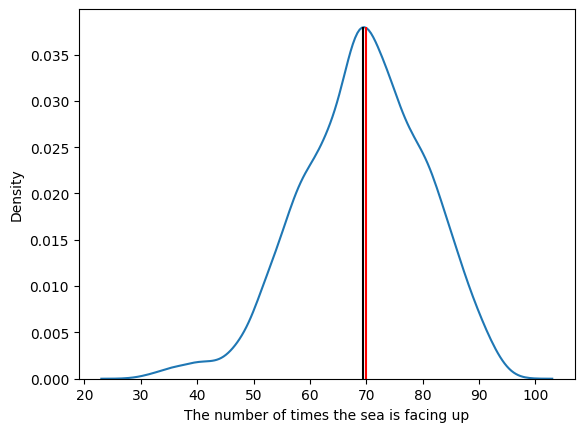

In [56]:
# 绘制预测数据的概率密度图
sns.kdeplot(predictive_data)

# 对比真实数据与预测数据
observed_data = 70
predictive_data_mean = np.mean(predictive_data) 
# 红色竖线为数据真实值
plt.vlines(observed_data,ymin=0,ymax=0.038,color="red")
# 黑色竖线为预测数据的平均值
plt.vlines(predictive_data_mean,ymin=0,ymax=0.038,color="black")
plt.xlabel("The number of times the sea is facing up")

可以看到，数据预测的均值（黑线）与真实数据（红线）非常接近。

总结：
- 了解了贝叶斯公式中分母（边际似然）对于后验的影响
- 通过参数后验分布进行统计推断，包括通过点估计的三种方式与可信区间的两种方式。
- 比较了频率学派置信区间与贝叶斯可信区间的区别
- 通过代码练习如何从后验分布中生成预测数据